## 0.- Imports necesarios para el análisis estadístico

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

## 1.- Leer el fichero de datos de los pacientes con diabetes

### 1.1.- Cargamos el fichero en la variable df

In [2]:
# Path al fichero de datos
file_path = 'diabetes_data.csv'

# Leemos el fichero como un df de Pandas
df = pd.read_csv(file_path)

# Imprimimos la cabecera para ver si ha cargado
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### 1.2.- Obeservamos dimensiones del dataset y los nombres de columnas con sus tipos

In [3]:
# Numero de filas y columnas en el df
filas, columnas = df.shape
print(f"Numero de filas: {filas}")
print(f"Numero de columnas: {columnas}")

Numero de filas: 253680
Numero de columnas: 22


In [4]:
# Nombres de las columnas
nombres_columnas = df.columns
print("Columnas del df:", nombres_columnas)

Columnas del df: Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [5]:
# Imprimimos el resumen de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## 2.- Preprocesado del dataset

El preprocesamiento de datos es una etapa esencial en el proceso de aprendizaje automático. Se trata de la transformación de los datos brutos en un formato que sea más adecuado para el algoritmo de aprendizaje automático. Esta transformación puede incluir una variedad de pasos, como la limpieza de datos, la normalización de datos y la extracción de características.

La importancia del preprocesamiento de datos radica en que los datos brutos suelen estar contaminados con errores, inconsistencias y ruido. Estos errores pueden afectar negativamente al rendimiento del modelo de aprendizaje automático. Por ejemplo, si un modelo de aprendizaje automático se entrena en un conjunto de datos que contiene valores nulos, el modelo puede aprender a ignorar estas entradas, lo que puede conducir a una disminución de la precisión

### 2.1.- Eliminación de valores nulos

In [6]:
# Miramos si el dataset tiene valores nulos
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

En este caso, el dataset no tiene valores nulos pero añadimos la línea de codigo para eliminarlos por si en una futura parte del TFM el dataset es actualizado e incorpora valores nulos:

In [7]:
# Eliminamos los valores nulos
df.dropna(inplace=True) # Con inplace = True el resultado del dropna se actualiza sobre la propia variable df

### 2.2.- Eliminamos valores duplicados

In [8]:
# Buscamos si el dataframe tiene valores duplicados
filas_duplicadas = df[df.duplicated()]
print("Número de filas duplicadas : ", len(filas_duplicadas))

Número de filas duplicadas :  23899


In [9]:
# Miramos algunos ejemplos de filas duplicadas
filas_duplicadas.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [10]:
# Eliminamos duplicados
df.drop_duplicates(inplace=True)

In [11]:
# Comprobamos la nueva dimensión del dataset
# Numero de filas y columnas en el df
filas, columnas = df.shape
print(f"Numero de filas: {filas}")
print(f"Numero de columnas: {columnas}")

Numero de filas: 229781
Numero de columnas: 22


### 2.3.- Conversion de tipo float a entero

Aunque todas las columnas sean floats, todas ellas almacenan números con 0 en los decimales luego las convertimos a tipo INT para su posterior uso.

In [12]:
# Con un bucle for recorremos las columnas y las convertimos a tipo entero
for columna in df.columns:
    try:
        df[columna] = df[columna].astype(int)
    except ValueError:
        print(f"No se pudo convertir la columna {columna} a entero")

In [13]:
# Imprimimos el resumen de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          229781 non-null  int32
 1   HighBP                229781 non-null  int32
 2   HighChol              229781 non-null  int32
 3   CholCheck             229781 non-null  int32
 4   BMI                   229781 non-null  int32
 5   Smoker                229781 non-null  int32
 6   Stroke                229781 non-null  int32
 7   HeartDiseaseorAttack  229781 non-null  int32
 8   PhysActivity          229781 non-null  int32
 9   Fruits                229781 non-null  int32
 10  Veggies               229781 non-null  int32
 11  HvyAlcoholConsump     229781 non-null  int32
 12  AnyHealthcare         229781 non-null  int32
 13  NoDocbcCost           229781 non-null  int32
 14  GenHlth               229781 non-null  int32
 15  MentHlth              229781 non-n

### 2.4.- Guardamos el dataset limpio para futuros usos en el TFM

In [14]:
df.to_csv("diabetes_data_clean.csv", index=False)

## 3.- Análisis estadístico Exploratorio (EDA)


El análisis estadístico de un df es una tarea fundamental en el proceso de aprendizaje automático. Se trata de la exploración y caracterización de los datos para comprender mejor su estructura y distribución. Este análisis puede ayudar a identificar patrones y tendencias en los datos, así como a detectar problemas potenciales, como la presencia de valores atípicos o datos faltantes. Se ha dividido en dos apartados:

1. Análisis de todo el conjunto de datos
2. Análisis de las variables más influyentes

### 3.1.- Análisis de todo el conjunto de datos

#### 3.1.1.- Resumen estadístico de las columnas

In [15]:
# Imprimimos el resumen estadístico de cada columna menos de la de clasificación
df.drop(columns=['Diabetes_012']).describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,0.794813,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,0.403839,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


#### 3.1.2.- Pertenencia a cada catergoría de "No diabético", "Diabético", "Prediabético"

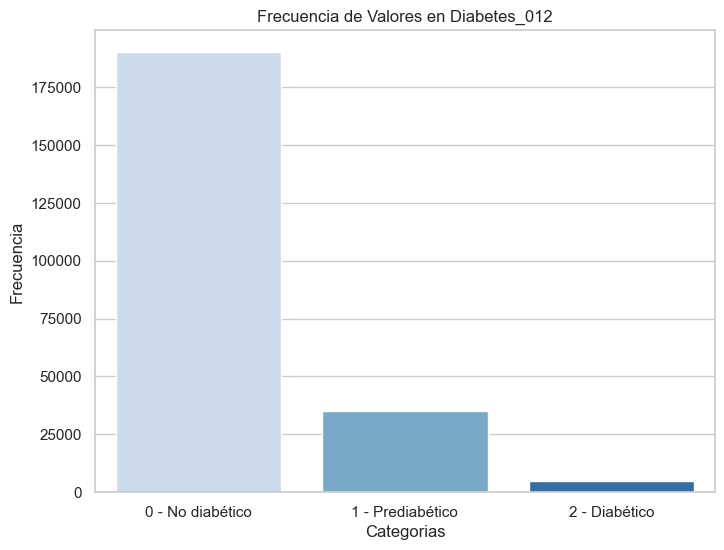

In [16]:
# Definimos un mapeo de etiquetas para los valores en 'Diabetes_012'
etiquetas = {0: 'No diabético', 1: 'Prediabético', 2: 'Diabético'}

# Cereamos una copia a modificar
df_graficas = df.copy()
df_graficas['Diabetes_012'] = df_graficas['Diabetes_012'].map(etiquetas)

# Gráfica de barras con barras estrechas, color azul, cuadrícula y leyenda
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(data=df_graficas, x='Diabetes_012', palette="Blues")
plt.title("Frecuencia de Valores en Diabetes_012")
plt.xlabel("Categorias")
plt.ylabel("Frecuencia")

# Personaliza la leyenda
legend_labels = [f"{key} - {value}" for key, value in etiquetas.items()]
ax.set_xticklabels(legend_labels)

plt.show()

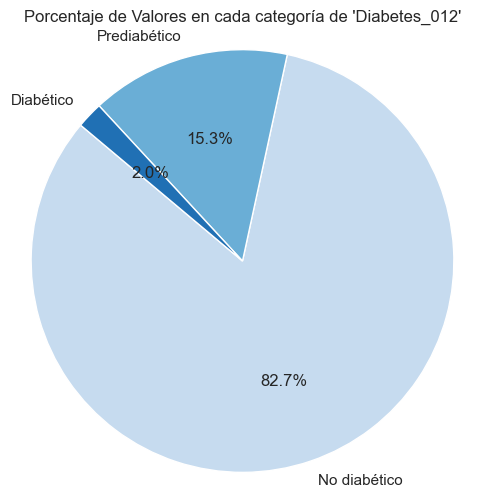

In [17]:
# Gráfico circular para mostrar el porcentaje de pertenencia a cada valor en 'Diabetes_012'
plt.figure(figsize=(6, 6))
labels = list(df_graficas['Diabetes_012'].value_counts().index)
labels[1] = 'Prediabético'
labels[2] = 'Diabético'
sizes = df_graficas['Diabetes_012'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", n_colors=3))
plt.title("Porcentaje de Valores en cada categoría de 'Diabetes_012'")
plt.axis('equal') 
plt.show()

Podemos ver como la mayoría de pacientes son no diabéticos mientras que el grupo más reducido es el de los prediabéticos. Los catalogados como Diabéticos solo son un 15.3% de los pacientes mueswtreados.

#### 3.1.3.- Coeficiente de Punto Biseral para la correlación entre variables numéricas y la categorica Diabates

El coeficiente de punto biserial es una medida de la correlación entre una variable numérica y una variable categórica

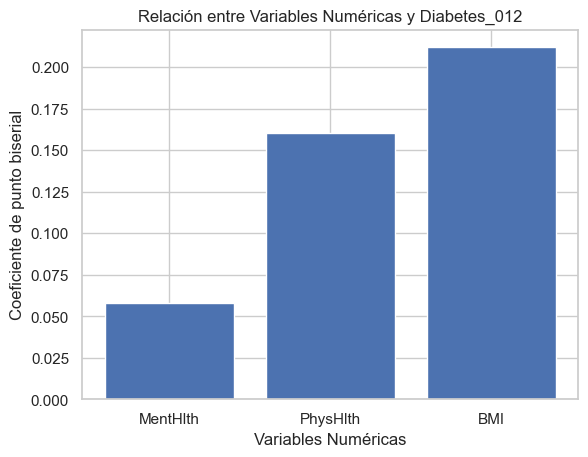

In [18]:
# Calculamos los coeficientes de punto biserial
coefs = {}
for col in ['MentHlth', 'PhysHlth', 'BMI']:
    coef, _ = pointbiserialr(df[col], df['Diabetes_012'])
    coefs[col] = coef

# Creamos un gráfico de barras para visualizar los coeficientes
plt.bar(coefs.keys(), coefs.values())
plt.xlabel('Variables Numéricas')
plt.ylabel('Coeficiente de punto biserial')
plt.title('Relación entre Variables Numéricas y Diabetes_012')
plt.show()

#### 3.1.4.- Heatmap para tabla de contingencia entre variables categóricas

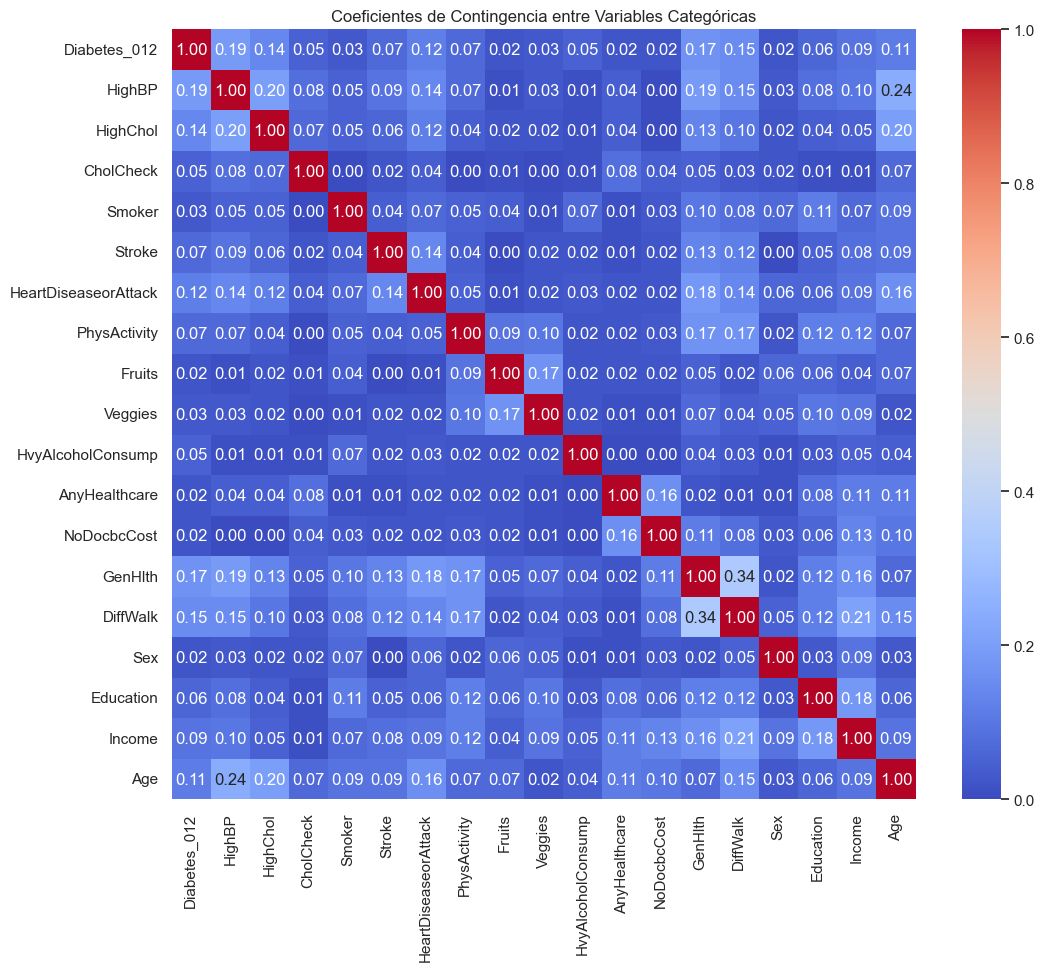

In [19]:
# Seleccionamos solo las variables categóricas
variables_categoricas = [
    'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk',
    'Sex', 'Education', 'Income', 'Age'
]

df_categorico = df[variables_categoricas]

# Creamos un DataFrame para almacenar los coeficientes de contingencia
coeficientes_contingencia = pd.DataFrame(index=df_categorico.columns, columns=df_categorico.columns)

# Calculamos el coeficiente de contingencia entre cada par de variables
for col1 in df_categorico.columns:
    for col2 in df_categorico.columns:
        contingency_table = pd.crosstab(df_categorico[col1], df_categorico[col2])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        coef = ((chi2 / (len(df_categorico) * min(contingency_table.shape) - 1)) ** 0.5)
        if col1 == col2:
            coeficientes_contingencia.loc[col1, col2] = 1
        else:
            coeficientes_contingencia.loc[col1, col2] = round(coef, 2)

coeficientes_contingencia = coeficientes_contingencia.apply(pd.to_numeric)

# Creamos mapa de calor con Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(coeficientes_contingencia, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Coeficientes de Contingencia entre Variables Categóricas')
plt.show()


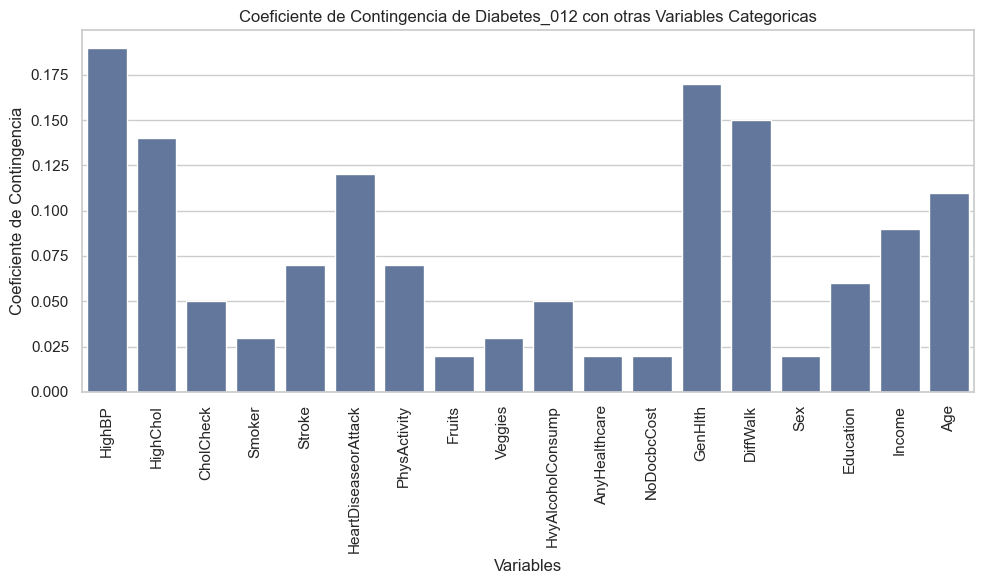

In [20]:
# Obtenemos la fila correspondiente a 'Diabetes_012' excluyendo la comparación con ella misma
coef_diabetes = coeficientes_contingencia.loc['Diabetes_012'].drop('Diabetes_012')

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_diabetes.index, y=coef_diabetes.values ,color="#5975A4")
plt.xlabel('Variables')
plt.ylabel('Coeficiente de Contingencia')
plt.title('Coeficiente de Contingencia de Diabetes_012 con otras Variables Categoricas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 3.1.5.- Heatmap para tabla de correlación entre variables muméricas sin Diabetes

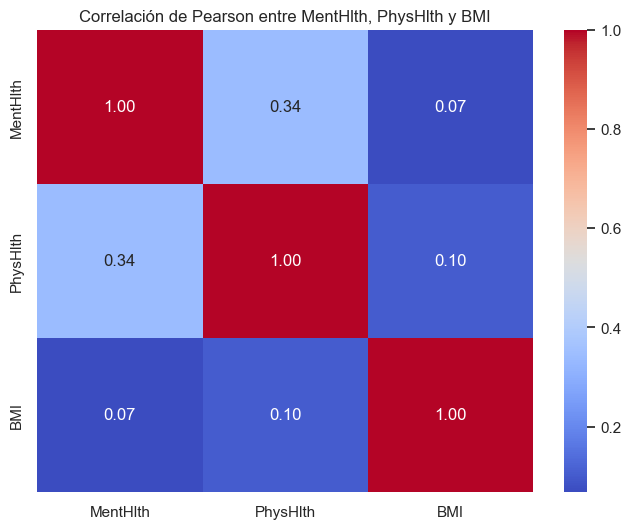

In [21]:
# Calculamos la matriz de correlación de Pearson
correlation_matrix = df[['MentHlth', 'PhysHlth', 'BMI']].corr(method='pearson')

# Creamos el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación de Pearson entre MentHlth, PhysHlth y BMI')
plt.show()

#### 3.1.5.- Histograma de distribuciones para cada variable


La importancia de un histograma para ver las distribuciones radica en que es una forma eficaz de visualizar la distribución de una variable. Un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. La distribución de una variable es una medida de cómo se distribuyen los valores de la variable. Una distribución puede ser normal, uniforme, sesgada o multimodal.

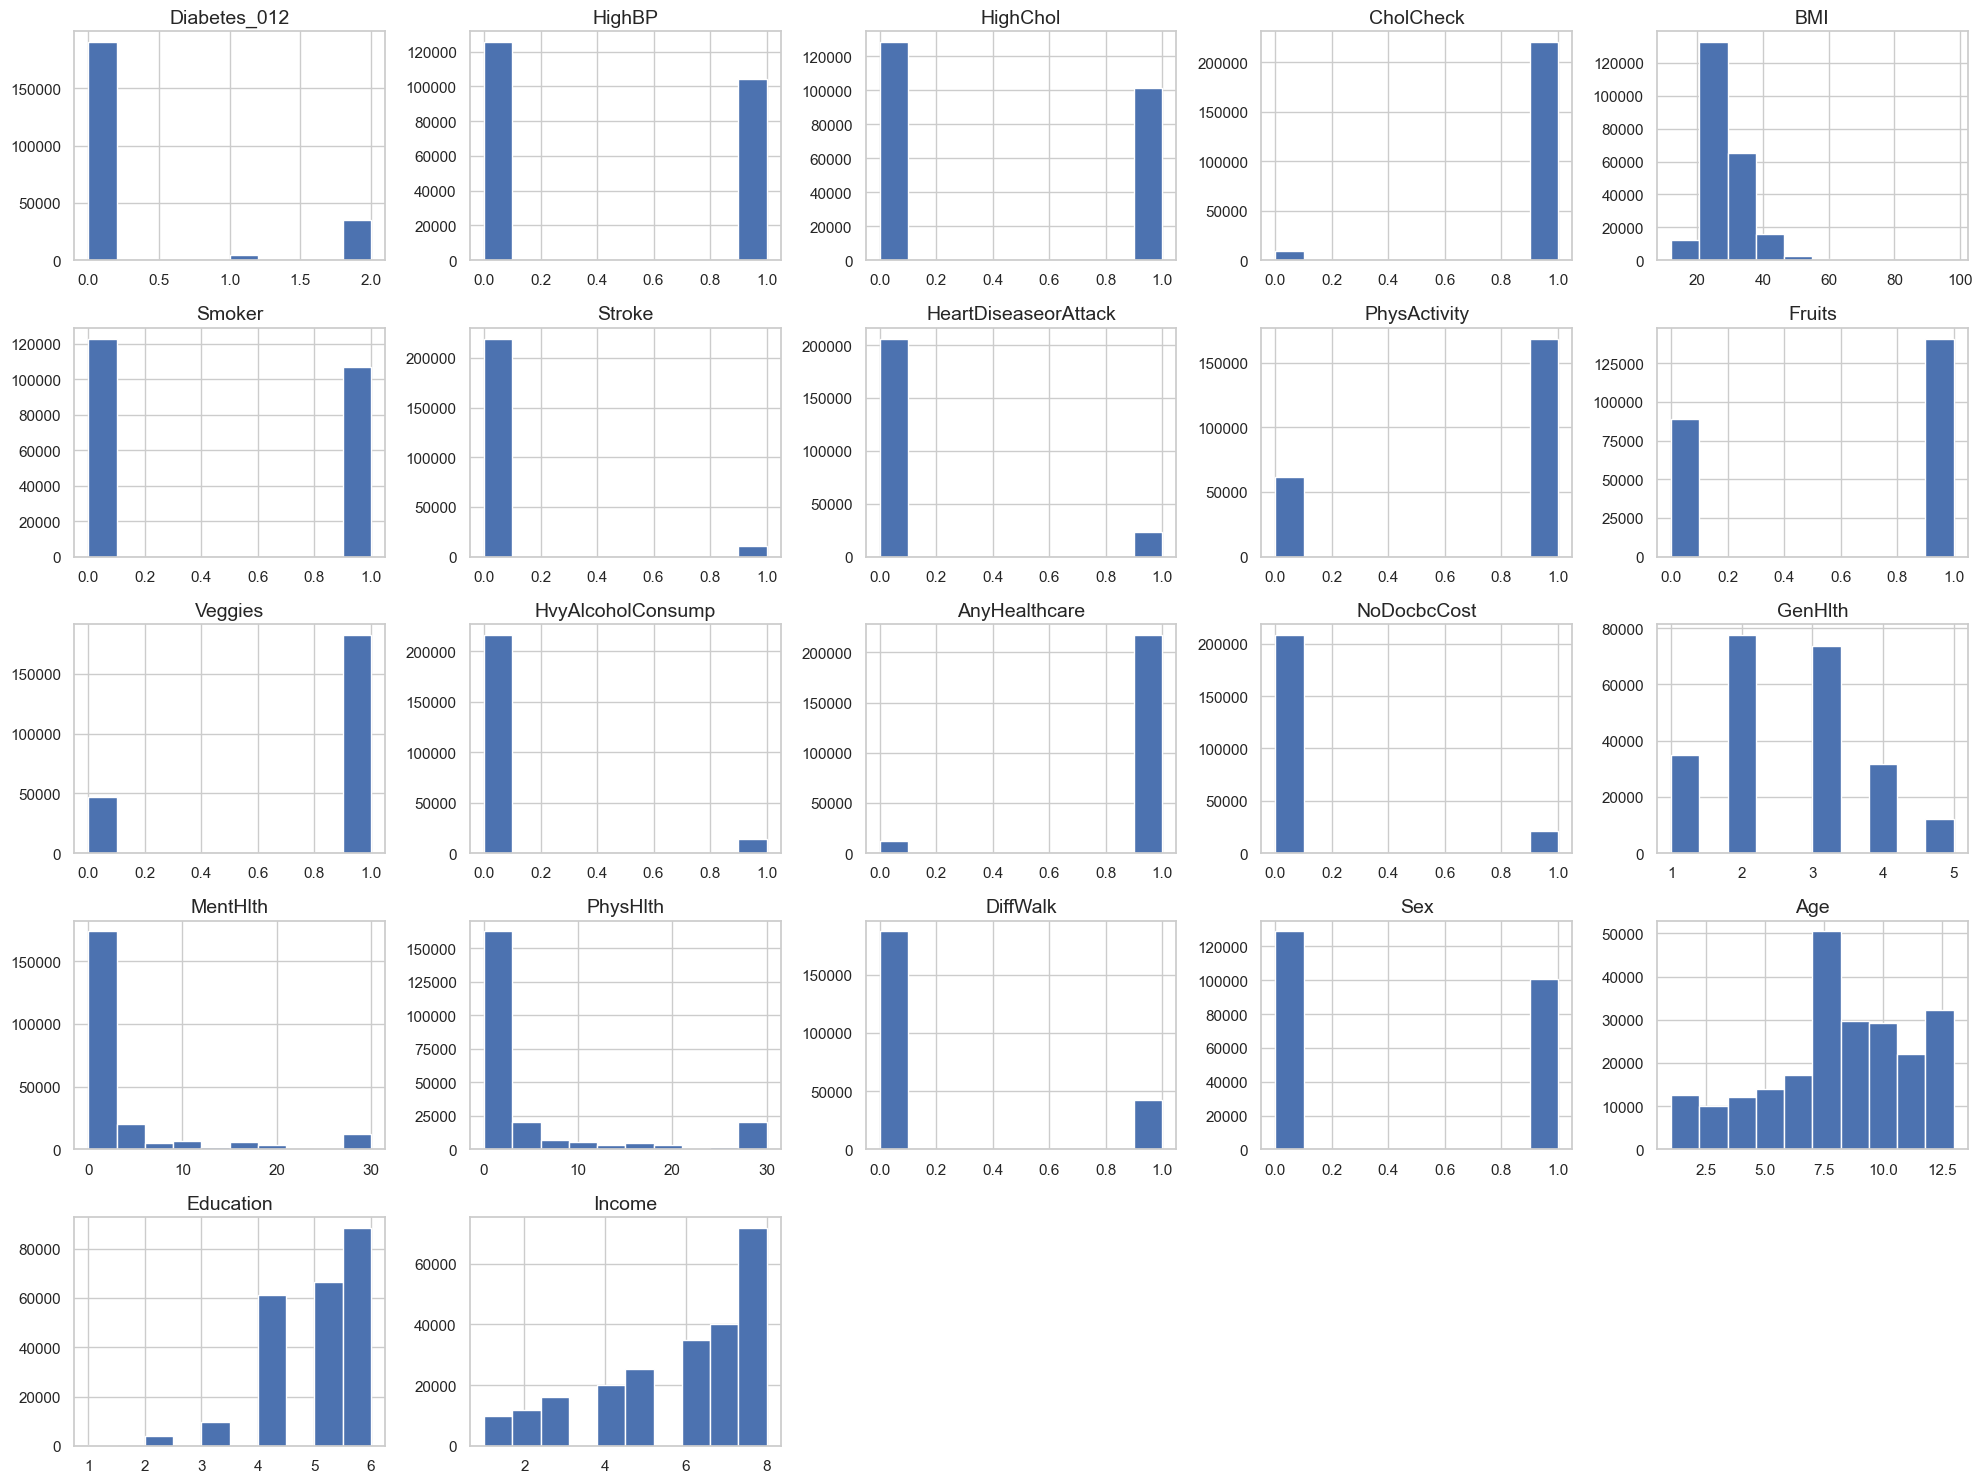

In [22]:
# Creamos los subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,15))

# Establecemos los axes como un array de una sola dimension
axes = axes.flatten()

# Recorremos todos los subplots creados y pintamos el histograma
for i, col in enumerate(df.columns):
    df[col].hist(ax=axes[i])
    axes[i].set_title(col, fontsize=14)

# De la cuadrícula sobran los tres últimos osea que los borramos
for ax in axes[22:25]:
    ax.remove()

# Establecemos que aparezcan juntos para ahorrar espacio
plt.tight_layout()



### 3.2.- Análisis de las variables más influyentes

Este apartado recoge un análisis estadístico de las 4 variables más influyentes en la cariable predictiva: GenHlth, HighBP, BMI y DiffWalk.
Este análisis sería extendible a cualquiera de las variables.

In [23]:
# Añadimos una columna donde las categorias de enfermedad de Diabetes 0, 1, 2 sean sus nombres
df_analisis_variables = df.copy()
df_analisis_variables["categoria"]= df_analisis_variables["Diabetes_012"].replace({0: 'No diabético', 1: 'Prediabético', 2: 'Diabético'})

#### 3.2.1.- Relación de la variable GenHlth con la variable predictiva Diabetes_012

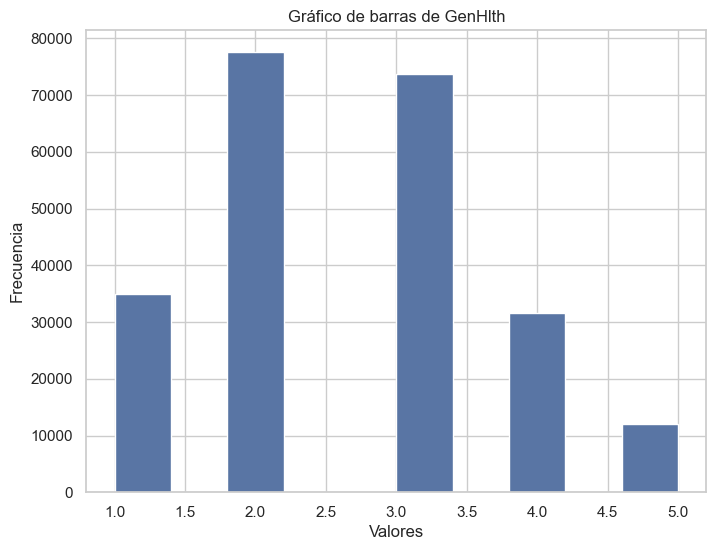

In [24]:
# Miramos el histograma de la variable en detalle
data = df_analisis_variables['GenHlth']
plt.figure(figsize=(8, 6))
plt.hist(data, color="#5975A4")
plt.title("Gráfico de barras de GenHlth")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

In [25]:
# Miramos el numero de pacientes para cada valor de la variable 
pd.crosstab(df_analisis_variables.GenHlth,df_analisis_variables.categoria)

categoria,Diabético,No diabético,Prediabético
GenHlth,,,
1,1135,33459,313
2,6280,70044,1212
3,13324,58662,1728
4,9781,20740,1025
5,4577,7150,351


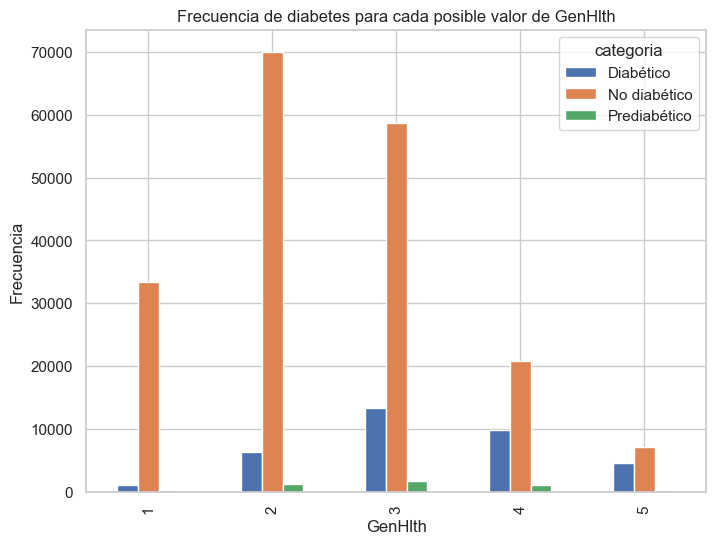

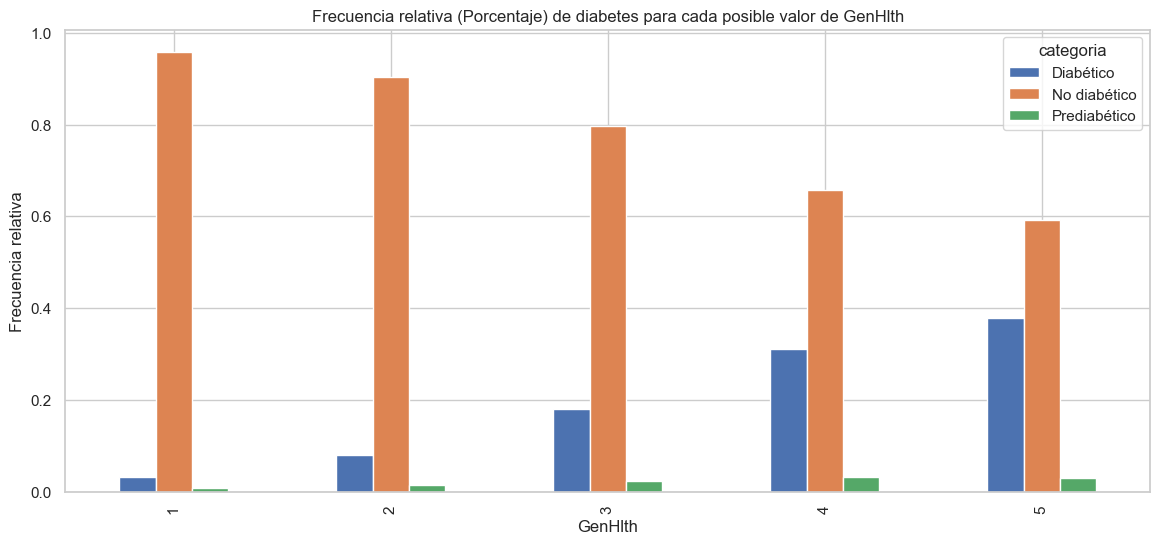

In [26]:
pd.crosstab(df_analisis_variables.GenHlth,df_analisis_variables.categoria).plot(kind="bar",figsize=(8,6))

plt.title('Frecuencia de diabetes para cada posible valor de GenHlth')
plt.xlabel("GenHlth")
plt.ylabel('Frecuencia')
plt.show()

tabla_cruzada = pd.crosstab(df_analisis_variables['GenHlth'], df_analisis_variables['categoria'])

# Calculamos la frecuencia relativa para la representación en procentaje
frecuencia_relativa = tabla_cruzada.div(tabla_cruzada.sum(1), axis=0)

# Creamos  el gráfico de barras
frecuencia_relativa.plot(kind="bar", figsize=(14, 6))

plt.title('Frecuencia relativa (Porcentaje) de diabetes para cada posible valor de GenHlth')
plt.xlabel("GenHlth")
plt.ylabel('Frecuencia relativa')
plt.show()

#### 3.2.2.- Relación de la variable HighBP con la variable predictiva Diabetes_012

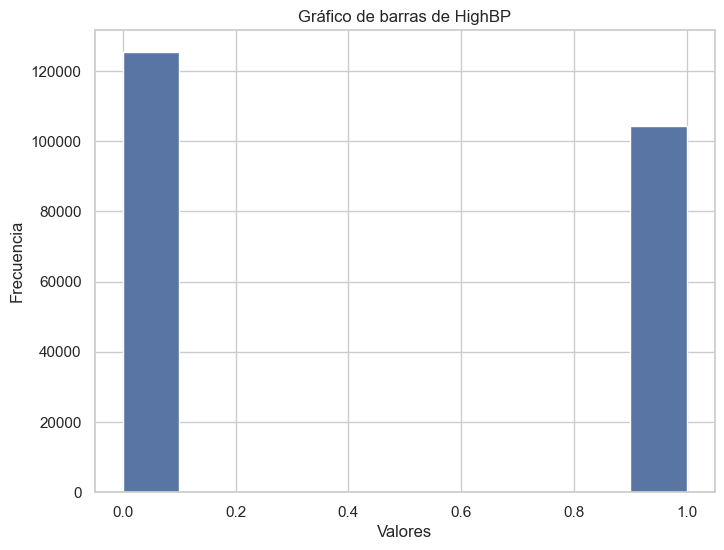

In [27]:
# Miramos el histograma de la variable en detalle
data = df_analisis_variables['HighBP']
plt.figure(figsize=(8, 6))
plt.hist(data, color="#5975A4")
plt.title("Gráfico de barras de HighBP")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

In [28]:
# Miramos el numero de pacientes para cada valor de la variable 
pd.crosstab(df_analisis_variables.HighBP,df_analisis_variables.categoria)

categoria,Diabético,No diabético,Prediabético
HighBP,,,
0,8692,114950,1717
1,26405,75105,2912


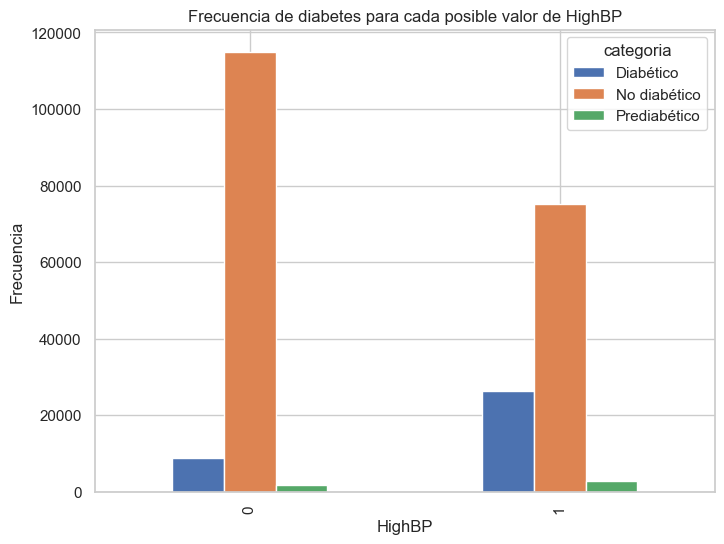

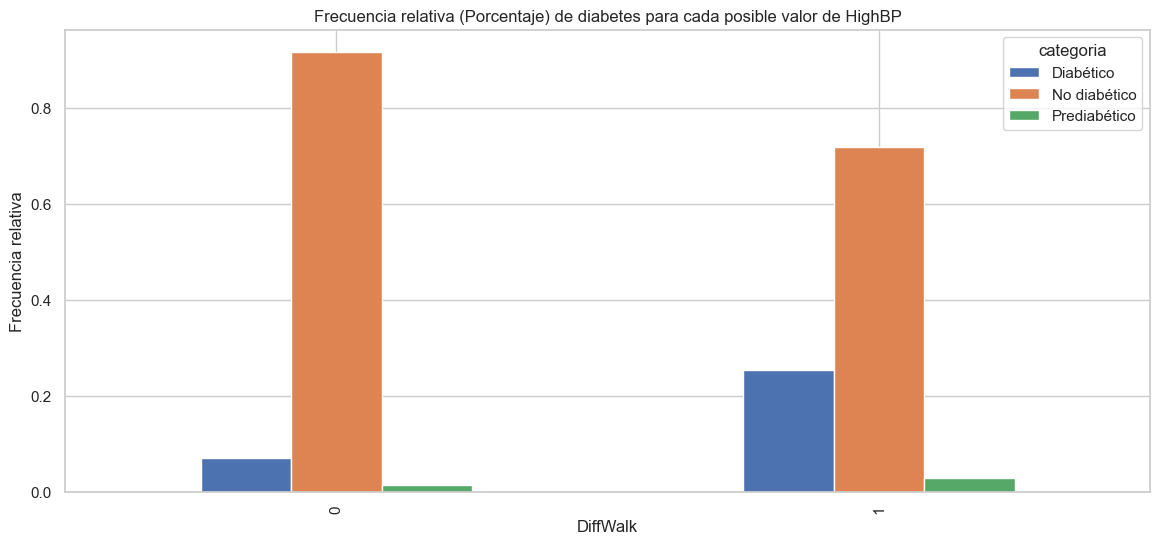

In [29]:
pd.crosstab(df_analisis_variables.HighBP,df_analisis_variables.categoria).plot(kind="bar",figsize=(8,6))

plt.title('Frecuencia de diabetes para cada posible valor de HighBP')
plt.xlabel("HighBP")
plt.ylabel('Frecuencia')
plt.show()

tabla_cruzada = pd.crosstab(df_analisis_variables['HighBP'], df_analisis_variables['categoria'])

# Calculamos la frecuencia relativa para la representación en procentaje
frecuencia_relativa = tabla_cruzada.div(tabla_cruzada.sum(1), axis=0)

# Creamos  el gráfico de barras
frecuencia_relativa.plot(kind="bar", figsize=(14, 6))

plt.title('Frecuencia relativa (Porcentaje) de diabetes para cada posible valor de HighBP')
plt.xlabel("DiffWalk")
plt.ylabel('Frecuencia relativa')
plt.show()

#### 3.2.3.- Relación de la variable BMI con la variable predictiva Diabetes_012

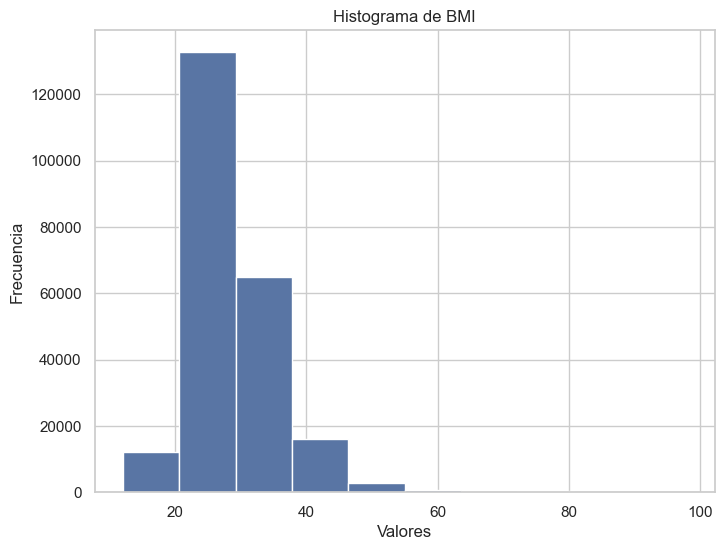

In [30]:
# Miramos el histograma de la variable en detalle
data = df_analisis_variables['BMI']
plt.figure(figsize=(8, 6))
plt.hist(data, color="#5975A4")
plt.title("Histograma de BMI")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

In [31]:
# Visualización de los valores de BMI 
ax= px.treemap(df_analisis_variables,path=['BMI'],title="BMI distribución de valores")
ax.show()

<Axes: >

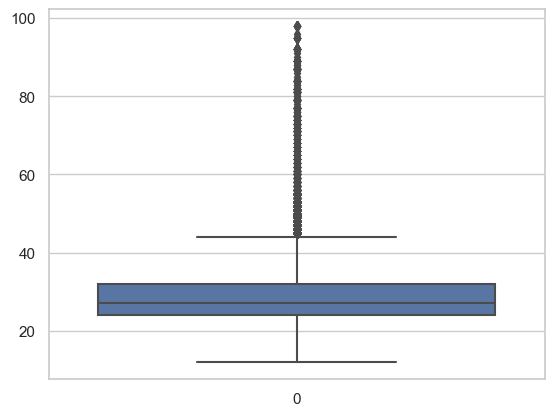

In [32]:
# Miramos los outlayers de la variable con un boxplot
sns.boxplot(df_analisis_variables["BMI"])

Como vemos los valores atípicos de BMI están por encima de 50

In [33]:
labels = ['Bajo peso', 'Peso normal', 'Sobrepeso', 'Obesidad clase I', 'Obesidad clase II', 'Obesidad clase III']
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 50.0]
df_analisis_variables['Grupo_BMI'] = pd.cut(df_analisis_variables['BMI'], bins, labels=labels)

In [34]:
# Miramos el numero de pacientes para cada valor de la variable 
pd.crosstab(df_analisis_variables.Grupo_BMI,df_analisis_variables.categoria)

categoria,Diabético,No diabético,Prediabético
Grupo_BMI,,,
Bajo peso,169,2856,28
Peso normal,3910,54328,689
Sobrepeso,10565,70770,1524
Obesidad clase I,10193,39257,1315
Obesidad clase II,5653,14160,648
Obesidad clase III,3904,7279,358


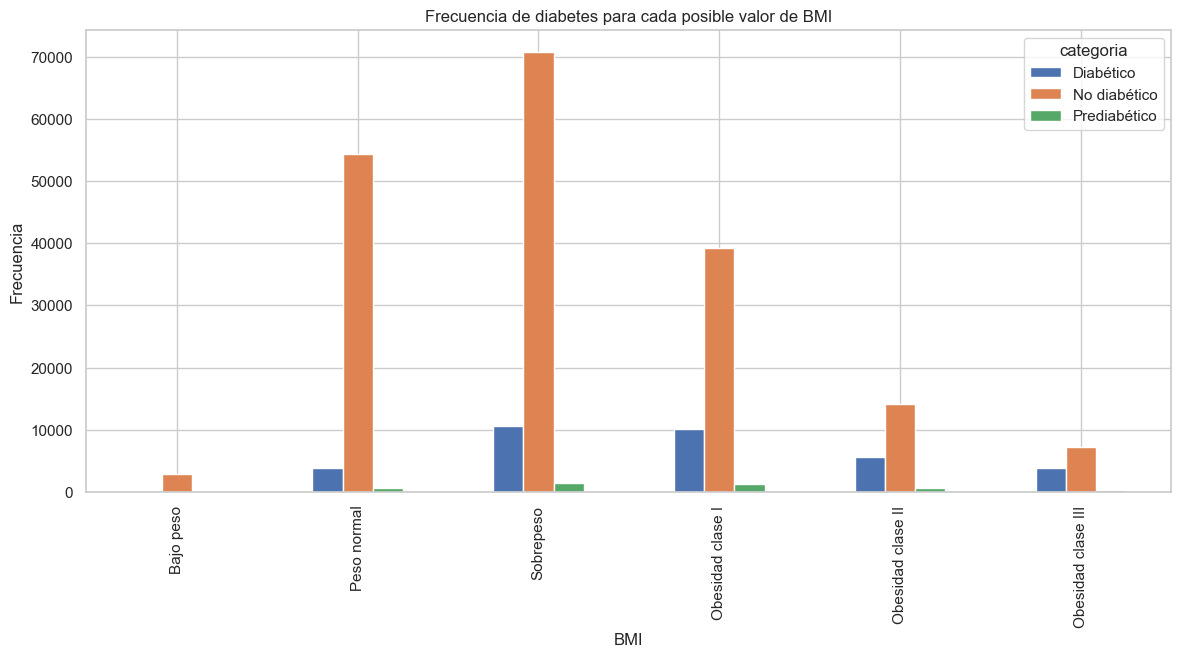

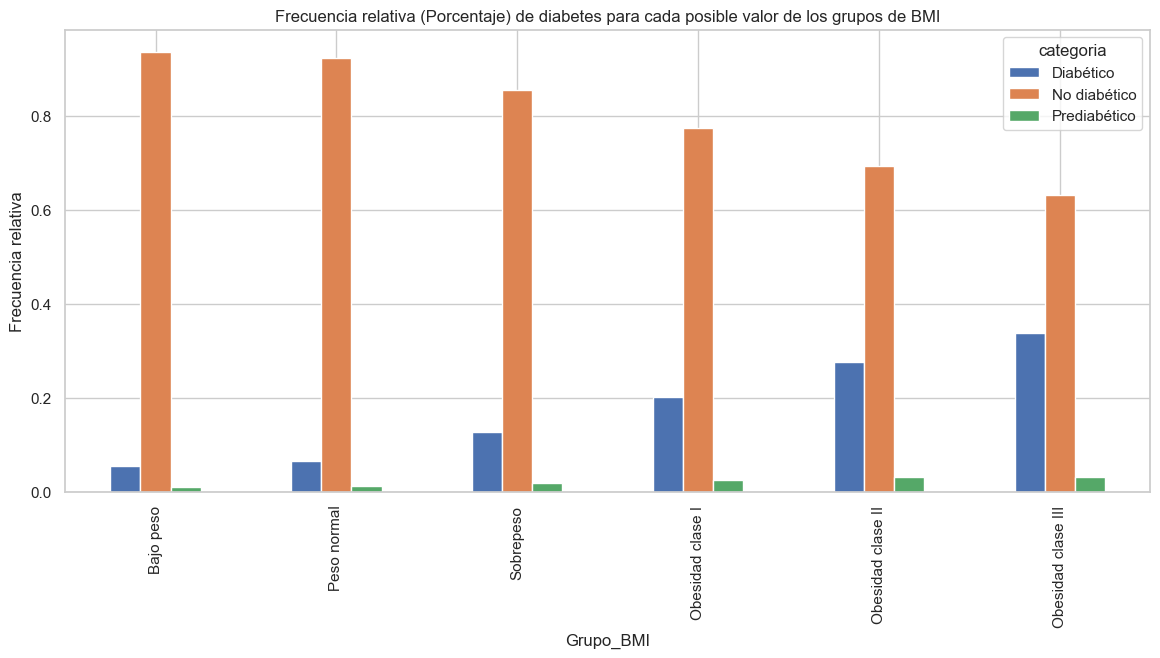

In [35]:
pd.crosstab(df_analisis_variables.Grupo_BMI,df_analisis_variables.categoria).plot(kind="bar",figsize=(14,6))

plt.title('Frecuencia de diabetes para cada posible valor de BMI')
plt.xlabel("BMI")
plt.ylabel('Frecuencia')
plt.show()


tabla_cruzada = pd.crosstab(df_analisis_variables['Grupo_BMI'], df_analisis_variables['categoria'])

# Calculamos la frecuencia relativa para la representación en procentaje
frecuencia_relativa = tabla_cruzada.div(tabla_cruzada.sum(1), axis=0)

# Creamos  el gráfico de barras
frecuencia_relativa.plot(kind="bar", figsize=(14, 6))

plt.title('Frecuencia relativa (Porcentaje) de diabetes para cada posible valor de los grupos de BMI')
plt.xlabel("Grupo_BMI")
plt.ylabel('Frecuencia relativa')
plt.show()

#### 3.2.4.- Relación de la variable DiffWalk con la variable predictiva Diabetes_012

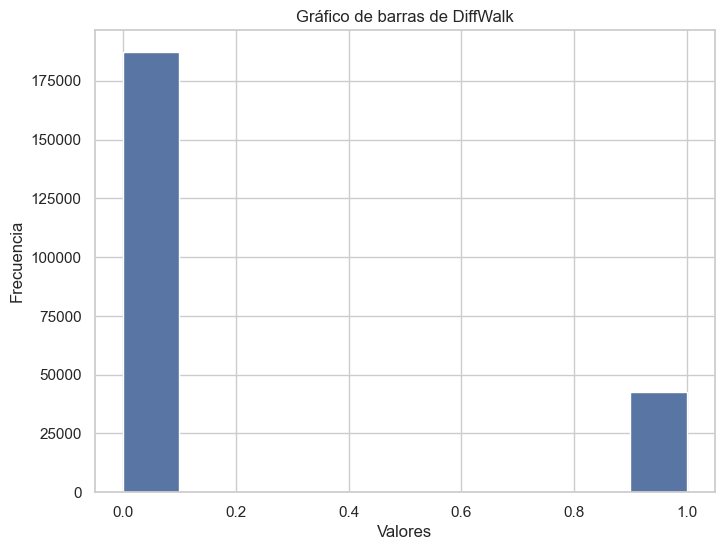

In [36]:
# Miramos el histograma de la variable en detalle
data = df_analisis_variables['DiffWalk']
plt.figure(figsize=(8, 6))
plt.hist(data, color="#5975A4")
plt.title("Gráfico de barras de DiffWalk")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

In [37]:
# Miramos el numero de pacientes para cada valor de la variable 
pd.crosstab(df_analisis_variables.DiffWalk,df_analisis_variables.categoria)

categoria,Diabético,No diabético,Prediabético
DiffWalk,,,
0,21983,161828,3344
1,13114,28227,1285


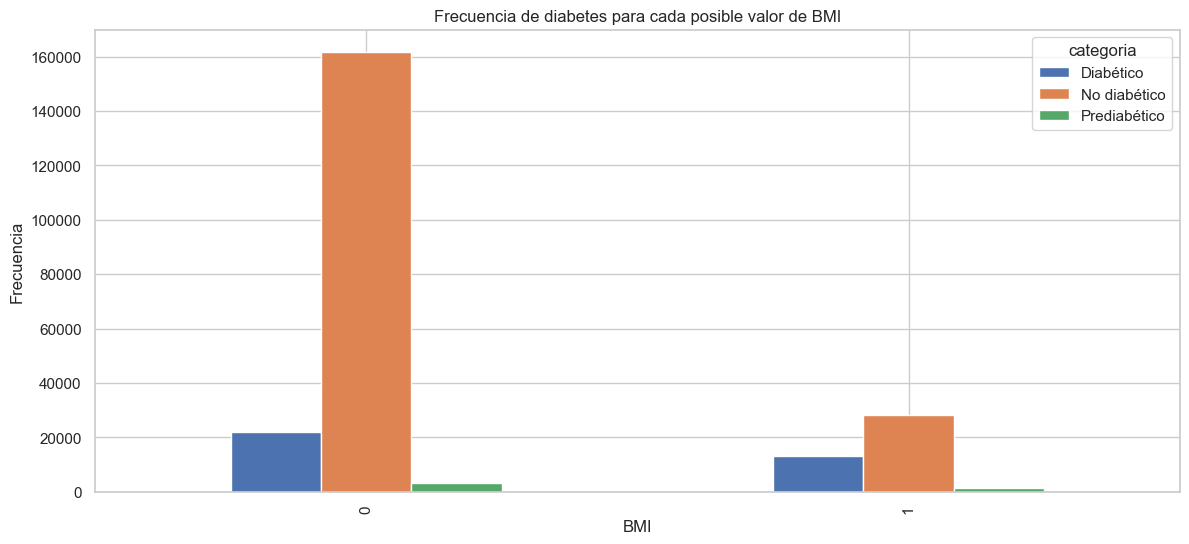

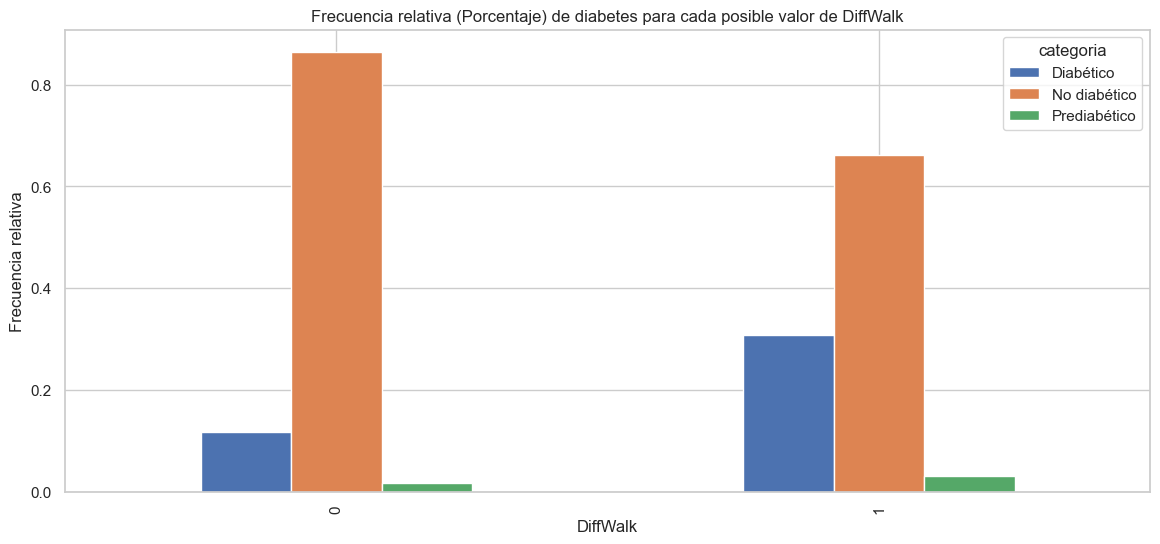

In [38]:
pd.crosstab(df_analisis_variables.DiffWalk,df_analisis_variables.categoria).plot(kind="bar",figsize=(14,6))

plt.title('Frecuencia de diabetes para cada posible valor de BMI')
plt.xlabel("BMI")
plt.ylabel('Frecuencia')
plt.show()


tabla_cruzada = pd.crosstab(df_analisis_variables['DiffWalk'], df_analisis_variables['categoria'])

# Calculamos la frecuencia relativa para la representación en procentaje
frecuencia_relativa = tabla_cruzada.div(tabla_cruzada.sum(1), axis=0)

# Creamos  el gráfico de barras
frecuencia_relativa.plot(kind="bar", figsize=(14, 6))

plt.title('Frecuencia relativa (Porcentaje) de diabetes para cada posible valor de DiffWalk')
plt.xlabel("DiffWalk")
plt.ylabel('Frecuencia relativa')
plt.show()

#### 3.2.5.- Relación de la variable PhysHlth con la variable predictiva Diabetes_012

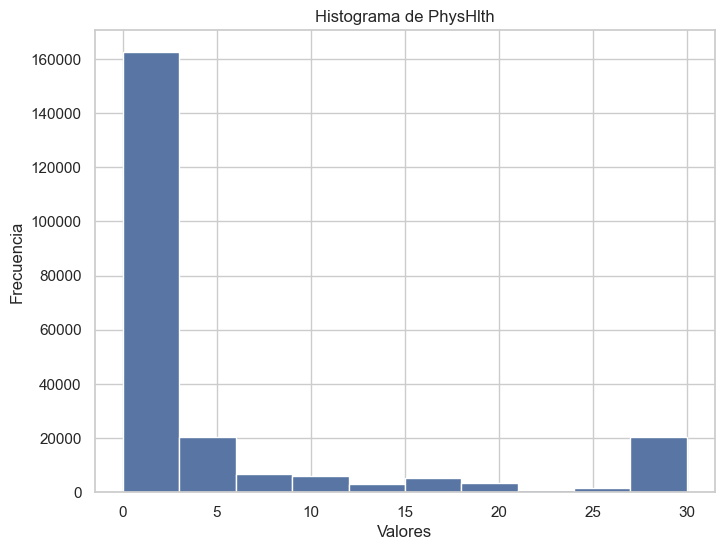

In [39]:
# Miramos el histograma de la variable en detalle
data = df_analisis_variables['PhysHlth']
plt.figure(figsize=(8, 6))
plt.hist(data, color="#5975A4")
plt.title("Histograma de PhysHlth")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

In [40]:
# Visualización de los valores de BMI 
ax= px.treemap(df_analisis_variables,path=['PhysHlth'],title="BMI distribución de valores")
ax.show()

<Axes: >

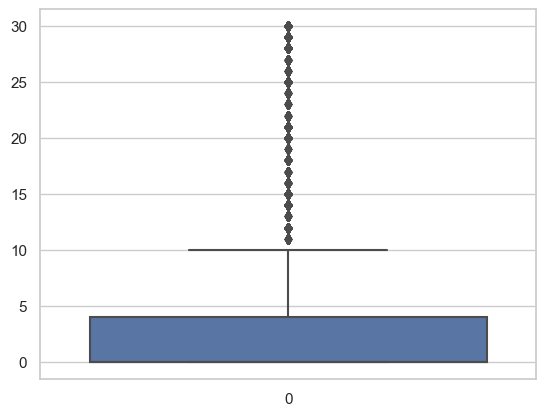

In [41]:
# Miramos los outlayers de la variable con un boxplot
sns.boxplot(df_analisis_variables["PhysHlth"])

In [42]:
# Como es una variable que mide y no clasifica en uno o varios grupos, creamos grupos por rangos de valores de 5 en 5 entre 0 y 30
df_analisis_variables['Grupo_PhysHlth'] = pd.cut(df_analisis_variables['PhysHlth'], bins=range(0, 30 + 5, 5))

In [43]:
# Miramos el numero de pacientes para cada valor de la variable 
pd.crosstab(df_analisis_variables.Grupo_PhysHlth,df_analisis_variables.categoria)

categoria,Diabético,No diabético,Prediabético
Grupo_PhysHlth,,,
"(0, 5]",6580,38681,861
"(5, 10]",2509,9602,324
"(10, 15]",1924,6048,232
"(15, 20]",1016,2548,91
"(20, 25]",587,1546,64
"(25, 30]",5984,13719,588


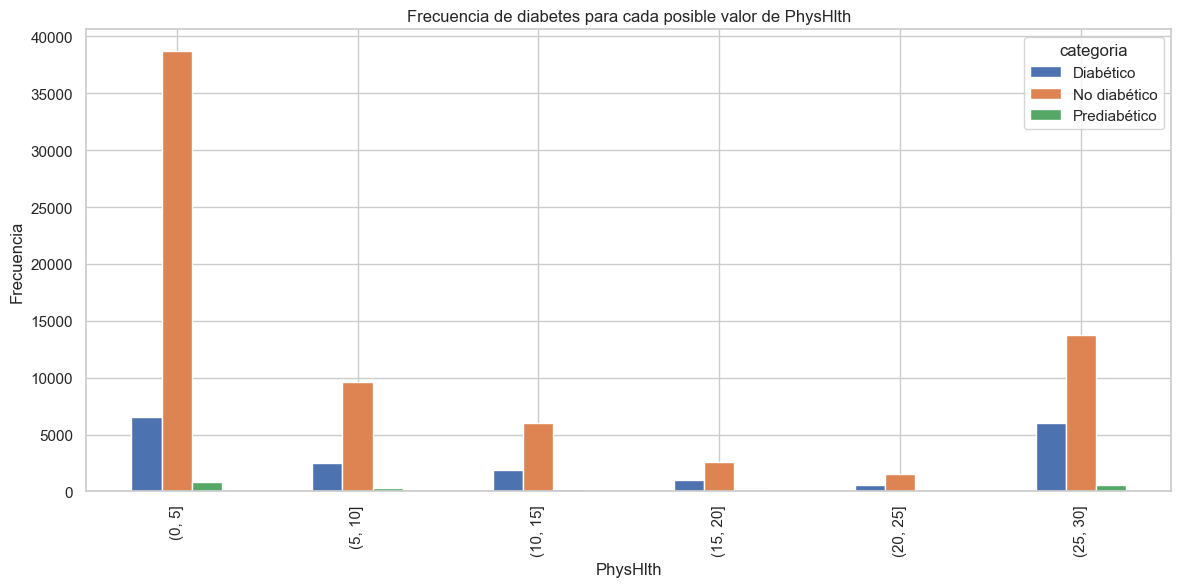

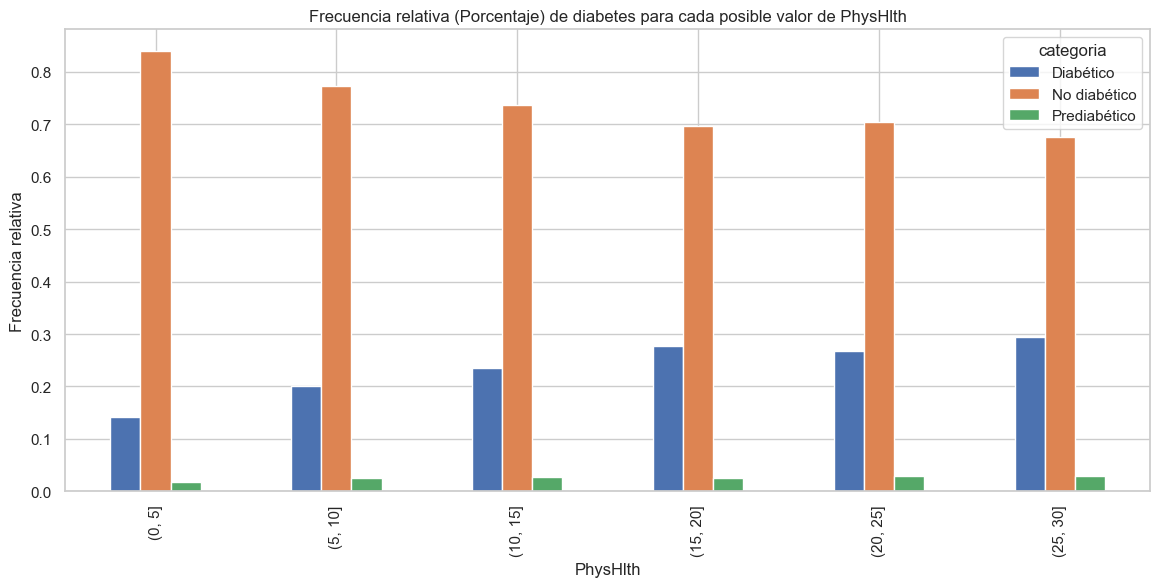

In [44]:
pd.crosstab(df_analisis_variables.Grupo_PhysHlth,df_analisis_variables.categoria).plot(kind="bar",figsize=(14,6))

plt.title('Frecuencia de diabetes para cada posible valor de PhysHlth')
plt.xlabel("PhysHlth")
plt.ylabel('Frecuencia')
plt.show()


tabla_cruzada = pd.crosstab(df_analisis_variables['Grupo_PhysHlth'], df_analisis_variables['categoria'])

# Calculamos la frecuencia relativa para la representación en procentaje
frecuencia_relativa = tabla_cruzada.div(tabla_cruzada.sum(1), axis=0)

# Creamos  el gráfico de barras
frecuencia_relativa.plot(kind="bar", figsize=(14, 6))

plt.title('Frecuencia relativa (Porcentaje) de diabetes para cada posible valor de PhysHlth')
plt.xlabel("PhysHlth")
plt.ylabel('Frecuencia relativa')
plt.show()